<b>Este trabalho foi realizado por Renan Alves de Medeiros e Nicolas Cursino Magarifuchi </b>

<b>Os dados utilizados estão presntes no site https://opendatasus.saude.gov.br/dataset/bd-srag-2020</b>

<b>Aviso Legal: Este notebook tem como finalidade apenas o estudo, deste modo não há garantia de qualquer tipo de precisão, confiabilidade ou atualidade das informações.
</b>

In [1]:
import pandas as pd
low_memory = False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
file = r'C:\Users\renan\INFLUD-30-06-2020.csv'
df = pd.read_csv(file, delimiter=';',
                 encoding = 'ISO-8859-1',
                 error_bad_lines = False,
                 
                 # Define as colunas a serem utilizadas na análise.
                 
                 usecols=['CS_SEXO', 'NU_IDADE_N', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'CLASSI_FIN', 'EVOLUCAO'])

In [3]:
# Colunas da tabela que serão utilizadas.

for k in range(len(df.columns)):
    print (k, df.columns[k])

0 CS_SEXO
1 NU_IDADE_N
2 CS_RACA
3 CS_ESCOL_N
4 SG_UF
5 CLASSI_FIN
6 EVOLUCAO


In [4]:
# Atribui a correspondência dos códigos de raça, escolaridade, classificação final da síndrome respiratória e evolução dos casos para seus respectivos valores.

troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela',
              4:'Parda', 5:'Indígena', 9:'Ignorado'}

troca_escolaridade = {0:'Sem', 1:'Fund1', 
                      2:'Fund2', 3:'Médio',
                      4:'Superior', 
                      5:'Não se aplica',
                      9:'Ignorado'}

troca_classificação = {1:'SRAG por influenza',
                       2: 'SRAG por outro vírus respiratório',
                       3: 'SRAG por outro agente Etiológico',
                       4: 'SRAG não especificado',
                       5: 'COVID-19'}

troca_evolução = {1:'Cura', 2:'Óbito', 9:'Ignorado'}

In [5]:
# Aloca os valores dos dicionários dentro dos códigos das colunas de raças, escolaridade, classificação final da síndrome respiratória e evolução dos casos.

df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_raça[x])

df.loc[(df.CS_ESCOL_N.isnull()), 'CS_ESCOL_N'] = 9
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].apply(lambda x: troca_escolaridade[x])

df.loc[(df.CLASSI_FIN.isnull()), 'CLASSI_FIN'] = 4
df['CLASSI_FIN'] = df['CLASSI_FIN'].apply(lambda x: troca_classificação[x])

df.loc[(df.EVOLUCAO.isnull()), 'EVOLUCAO'] = 9
df['EVOLUCAO'] = df['EVOLUCAO'].apply(lambda x: troca_evolução[x])

In [6]:
df.sample(50).sort_values('NU_IDADE_N')

,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,SG_UF,CLASSI_FIN,EVOLUCAO
106793,M,1,Ignorado,Não se aplica,SP,SRAG não especificado,Cura
9993,M,2,Branca,Não se aplica,MT,SRAG não especificado,Cura
155617,M,6,Branca,Não se aplica,PR,SRAG por outro vírus respiratório,Cura
286318,F,16,Parda,Médio,AM,COVID-19,Cura
50941,F,23,Branca,Superior,SP,COVID-19,Cura
295481,M,23,Parda,Ignorado,AM,COVID-19,Cura
64325,M,31,Branca,Ignorado,SP,SRAG não especificado,Cura
127141,M,33,Ignorado,Ignorado,ES,SRAG não especificado,Ignorado
162618,F,34,Ignorado,Ignorado,RJ,COVID-19,Cura
343858,F,35,Branca,Superior,RS,SRAG não especificado,Ignorado


Text(0.5, 1.0, 'Cinco estados com mais casos de SRAG')

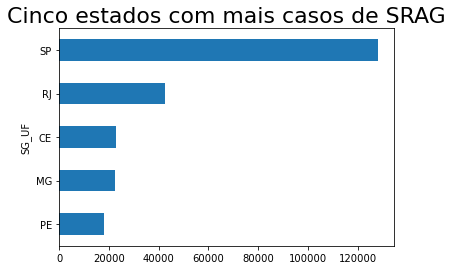

In [7]:
df.groupby('SG_UF').size().sort_values().tail(5).plot(kind='barh').set_title('Cinco estados com mais casos de SRAG', fontsize=22)

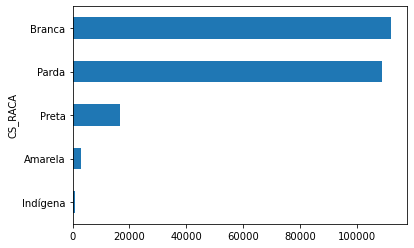

In [8]:
df.query('CS_RACA != "Ignorado"').groupby('CS_RACA').size().sort_values().plot(kind='barh')

In [9]:
df.groupby('CS_RACA').size().sort_values(ascending=False)

CS_RACA
Ignorado    114360
Branca      112116
Parda       108838
Preta        16796
Amarela       3123
Indígena       955
dtype: int64

In [10]:
df.groupby('CS_ESCOL_N').size().sort_values(ascending=False)

CS_ESCOL_N
Ignorado         225631
Médio             36922
Fund1             31913
Fund2             20960
Superior          18363
Não se aplica     12636
Sem                9763
dtype: int64

Text(0.5, 1.0, 'Óbito por SRAG por raça')

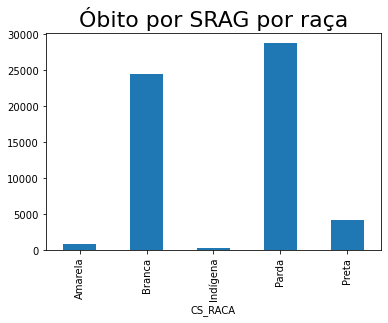

In [11]:
df.query('EVOLUCAO == "Óbito" and CS_RACA != "Ignorado"').groupby('CS_RACA').size().plot(kind='bar').set_title('Óbito por SRAG por raça', fontsize=22)

Text(0.5, 1.0, 'Índice de cura de SRAG por raça')

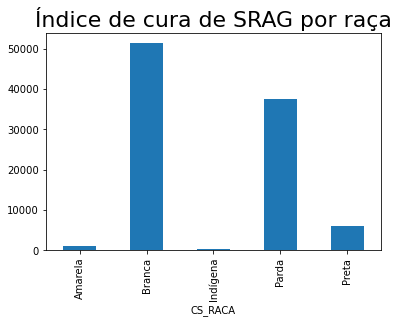

In [12]:
df.query('EVOLUCAO == "Cura" and CS_RACA != "Ignorado"').groupby('CS_RACA').size().plot(kind='bar').set_title('Índice de cura de SRAG por raça', fontsize=22)

Text(0.5, 1.0, 'Óbito por SRAG por nível de escolaridade')

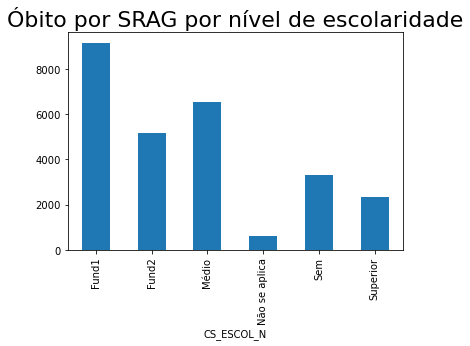

In [13]:
df.query('EVOLUCAO == "Óbito" and CS_ESCOL_N != "Ignorado"').groupby('CS_ESCOL_N').size().plot(kind='bar').set_title('Óbito por SRAG por nível de escolaridade', fontsize = 22)

Text(0.5, 1.0, 'Índice de cura de SRAG por nível de escolaridade')

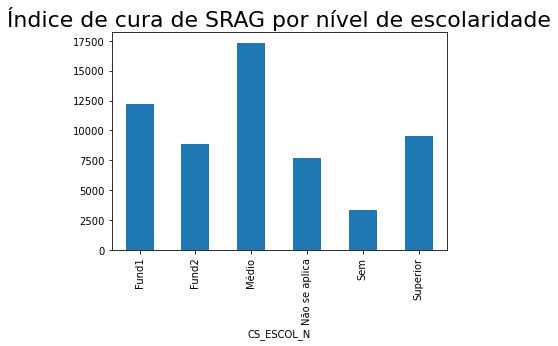

In [14]:
df.query('EVOLUCAO == "Cura" and CS_ESCOL_N != "Ignorado"').groupby('CS_ESCOL_N').size().plot(kind='bar').set_title('Índice de cura de SRAG por nível de escolaridade', fontsize = 22)

In [15]:
df.groupby('EVOLUCAO').size().sort_values(ascending=False)

EVOLUCAO
Cura        138626
Ignorado    132348
Óbito        85214
dtype: int64

Text(0.5, 1.0, 'Óbito por COVID-19 por idade')

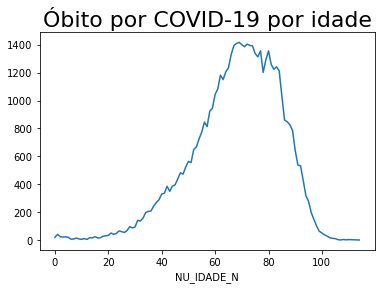

In [16]:
df.query('CLASSI_FIN == "COVID-19" and EVOLUCAO == "Óbito"').groupby('NU_IDADE_N').size().plot(kind='line').set_title('Óbito por COVID-19 por idade', fontsize=22)

Text(0.5, 1.0, 'Óbitos por SRAG por UF')

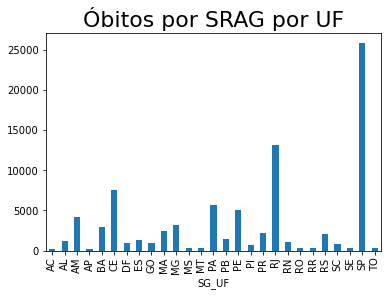

In [17]:
df.query('EVOLUCAO == "Óbito"').groupby('SG_UF').size().plot(kind='bar').set_title('Óbitos por SRAG por UF', fontsize=22)

Text(0.5, 1.0, 'Óbitos por COVID por sexo')

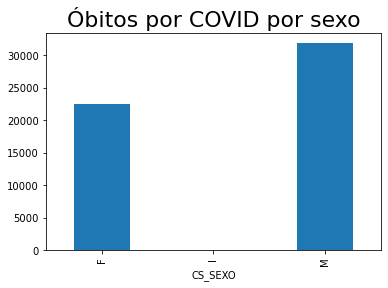

In [18]:
df.query('EVOLUCAO == "Óbito" and CLASSI_FIN == "COVID-19"').groupby('CS_SEXO').size().plot(kind='bar').set_title('Óbitos por COVID por sexo', fontsize=22)

<b> O seguinte trabalho foi utilizado como referência:</b>

<b>https://github.com/fmasanori/CursoPyLadiesSP/blob/master/OpendataSUS%20SRAG%202020.ipynb</b>

<b>Autor: Fernando Masanori</b>